# Logistic regression

* ㄴㅇ

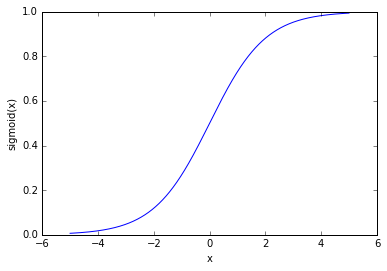

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def plotSigmoid(inX):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.arange(-inX, inX, 0.005)
    y = sigmoid(x)
    ax.plot(x, y)
    plt.xlabel('x');plt.ylabel('sigmoid(x)');
    plt.show()
    
plotSigmoid(5)

In [14]:
import numpy as np
v1 = np.array([1,2])
v2 = np.array([3,4])
print v1*v2

m1 = np.mat(v1)
m2 = np.mat(v2)
print m1*m2.T 

[3 8]
[[11]]


In [16]:
# 1차원일 경우 dot과 inner는 같지만 2차원 이상일 경우 다름
print v1.dot(v2)
print np.inner(v1,v2)

11
11


# convex를 찾는 방법
- gradient descending
- quadratic programming
- MATLAB cvx

In [47]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('C:/Users/suh/Desktop/machinelearninginaction/Ch05/testSet.txt')
    for line in fr.readlines(): # 파일을 memory에 올려놓는 것이 아닌 한줄 한줄 읽어옴
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])]) #dataMat의 자료형은 list
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat
        
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights) # 결과 는 100 by 1 matrix
        error = (labelMat - h)
        
        weights = weights + alpha * dataMatrix.transpose()*error # ':=' 기호의 의미 -> update
    return weights

dataMatIn, classLabels = loadDataSet()
weights = gradAscent(dataMatIn, classLabels)

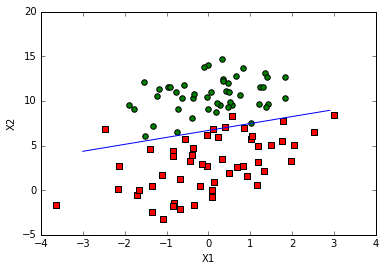

In [53]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
plotBestFit(weights.getA()) # getA => matrix를 array로 변환

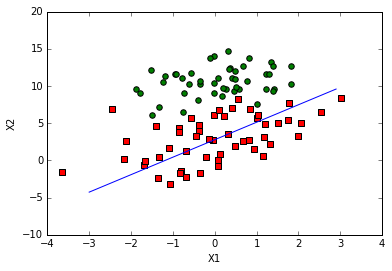

In [63]:
# 매번마다의 연산량을 줄이기 위해 하나의 데이터가 들어올 때마다 갱신하는 온라인 학습방법 사용 (연산이 백터가 아닌 스칼라)
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

dataArr, labelMat = loadDataSet()

weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

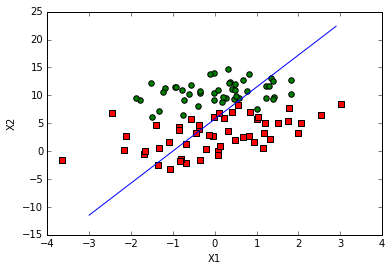

In [77]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m) # 0~99까지 인덱스배열 생성
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.001
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
        return weights
    
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat)
plotBestFit(weights)    

In [91]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
    
def colicTest():
    frTrain = open('C:/Users/suh/Desktop/machinelearninginaction/Ch05/horseColicTraining.txt')
    frTest = open('C:/Users/suh/Desktop/machinelearninginaction/Ch05/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
        
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights) != int(currLine[21])):
            errorCount += 1
        
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is : %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
        print "%d, %f" % (k, errorSum/float(numTests))
            
multiTest()

the error rate of this test is : 0.701493
0, 0.070149
the error rate of this test is : 0.582090
1, 0.128358
the error rate of this test is : 0.298507
2, 0.158209
the error rate of this test is : 0.298507
3, 0.188060
the error rate of this test is : 0.582090
4, 0.246269
the error rate of this test is : 0.417910
5, 0.288060
the error rate of this test is : 0.343284
6, 0.322388
the error rate of this test is : 0.656716
7, 0.388060
the error rate of this test is : 0.373134
8, 0.425373
the error rate of this test is : 0.358209
9, 0.461194


C:\Users\suh\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp
